In [7]:
# Import des packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

In [8]:
# import des données
df = pd.read_csv('Data/Titanic.csv', sep=';')
df.head()

,Class,Age,Sex,Survived
0,first,adult,male,yes
1,first,adult,male,yes
2,first,adult,male,yes
3,first,adult,male,yes
4,first,adult,male,yes


In [9]:
# Infos sur les donées
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Age       2201 non-null   object
 2   Sex       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 34.5+ KB


In [10]:
# Description des données
df.describe()

,Class,Age,Sex,Survived
count,2201,2201,2201,2201
unique,4,2,2,2
top,crew,adult,male,no
freq,885,2092,1731,1490


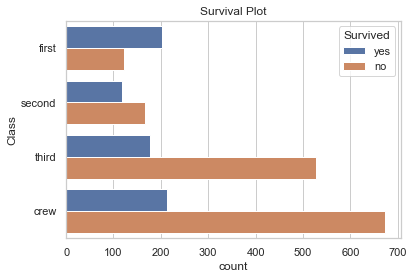

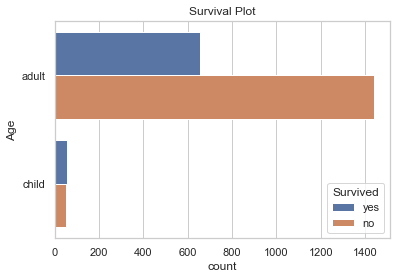

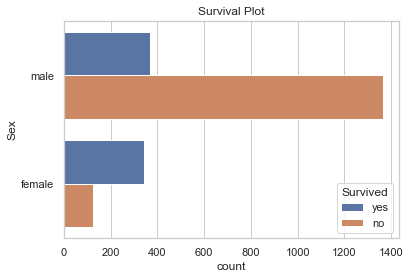

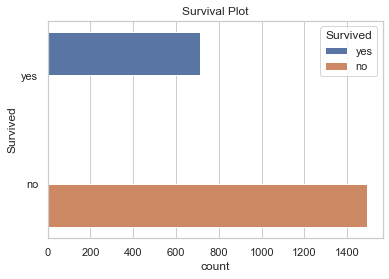

In [11]:
# Rendu visuel des données
for x in ['Class','Age', 'Sex', 'Survived']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=df)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()


In [12]:
# Convertion du dataset en One_hot_encoding (0,1 pour les datas)
df_encoded = pd.get_dummies(df)

# application de l'algo apriori pour obtenir les itemsets fréquents
frequent_itemsets = apriori(df_encoded, min_support=0.5, use_colnames=True)

# Dérivé des règles d'association à partir des itemsets fréquents
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                 antecedents               consequents   support  confidence  \
0                 (Sex_male)               (Age_adult)  0.757383    0.963027   
1                (Age_adult)                (Sex_male)  0.757383    0.796845   
2              (Survived_no)               (Age_adult)  0.653339    0.965101   
3                (Age_adult)             (Survived_no)  0.653339    0.687380   
4              (Survived_no)                (Sex_male)  0.619718    0.915436   
5                 (Sex_male)             (Survived_no)  0.619718    0.787984   
6    (Survived_no, Sex_male)               (Age_adult)  0.603816    0.974340   
7   (Survived_no, Age_adult)                (Sex_male)  0.603816    0.924200   
8      (Sex_male, Age_adult)             (Survived_no)  0.603816    0.797241   
9              (Survived_no)     (Sex_male, Age_adult)  0.603816    0.891946   
10                (Sex_male)  (Survived_no, Age_adult)  0.603816    0.767764   
11               (Age_adult)   (Survived